# Machine Learning Engineer Nanodegree
## Capstone Proposal Benchmark Model
Jonathan J. Hull, June 14, 2017
## Project: Supervised Learning Applied to Kaggle Covertype Data Set

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

----
## Setup Environment and Read the Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline
inline_rc = dict(mpl.rcParams)

data = pd.read_csv("kaggle_train.csv")

display(data.head(n=3))
print(len(data))

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2


15120


### Initial Data Exploration

In [2]:
# Total number of records
n_records = data.shape[0]

# count num. missing across both dimensions of data
num_missing    = data.isnull().sum().sum()
num_data_items = data.shape[1]
num_entries    = n_records*num_data_items
pct_missing    = 100.0*(float(num_missing))/num_entries

# Print the results
print("Total number of records: {}".format(n_records))
print("%d data items for each record: (%s)\n" % (num_data_items, list(data)))
print("%d=%f%% out of %d entries in input data are missing\n" % (num_missing,pct_missing,num_entries))

Total number of records: 15120
56 data items for each record: (['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type'])

0=0.000000% out 

### Class Distribution in Training Data

[]

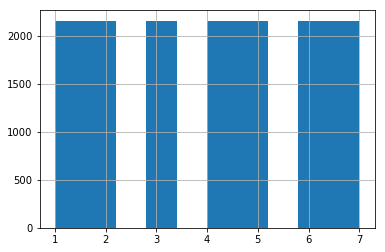

In [3]:
data['Cover_Type'].hist().plot()

### Prepare feature vectors for training data

In [4]:
display(data.head())
features = data.copy().drop(['Id','Cover_Type'],axis=1)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


### Prepare training and testing sets for building the classifiers
Randomly choose 20% of the training data and set it aside for our evaluation.

In [6]:
# Import train_test_split
from sklearn.model_selection import train_test_split

classes  = data['Cover_Type']
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 12096 samples.
Testing set has 3024 samples.


### Initial Evaluation with Decision Tree

Get an idea what the decision tree thinks are the most informative features

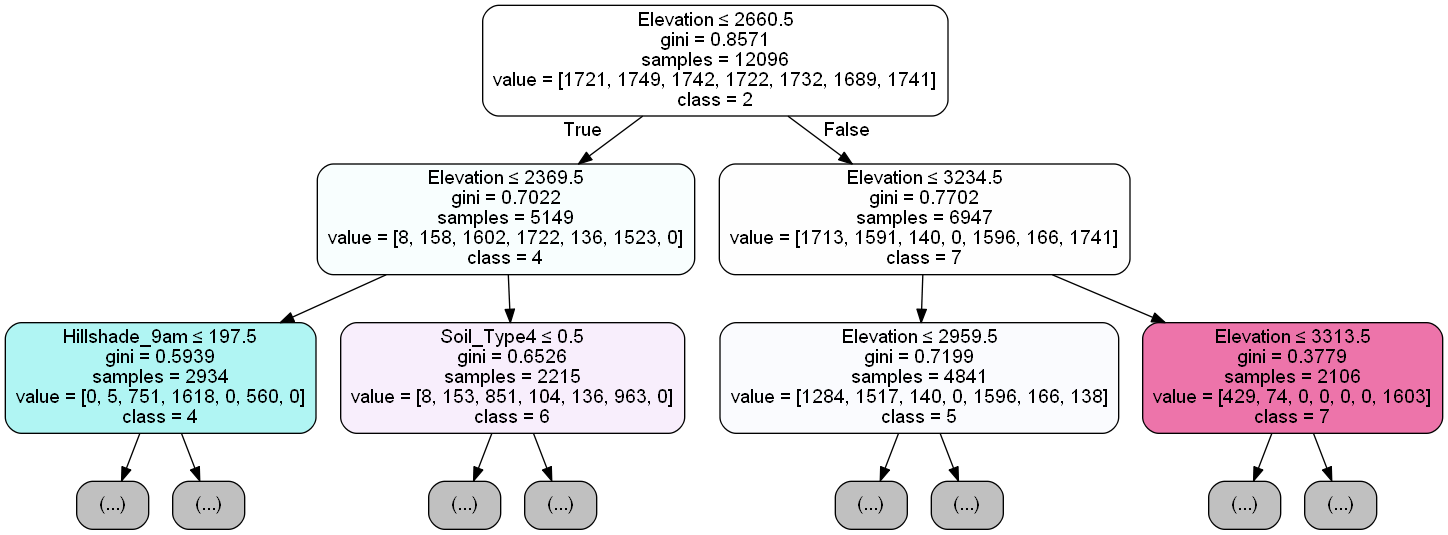

In [7]:
#
# derive a decision tree classifier for our data and plot its first two levels (below the root).
#  The purpose is to determine illustrate the utility of the graphviz visualization.
#
import pydotplus 
from IPython.display import Image
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(decision_tree=clf, filled=True, rounded=True, 
                                feature_names=features.columns, class_names=("1","2","3","4","5","6","7"),
                                max_depth=2, special_characters=True, out_file='dot.dot')
graph = pydotplus.graphviz.graph_from_dot_file("dot.dot")
Image(graph.create_png())  

### Obtain Baseline Performance of Many Classifiers

In [8]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,\
                                 RandomForestClassifier
    
for clf in [DecisionTreeClassifier(), LogisticRegression(), SGDClassifier(),  BaggingClassifier(),
           AdaBoostClassifier(), GradientBoostingClassifier(), RandomForestClassifier()]:
    start_time  = time()
    learner     = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    end_time    = time()
    print("%s: %2.3f%% %0.1f secs." % (clf.__class__.__name__, \
                                       100.0*accuracy_score(y_test, predictions), \
                                      (end_time-start_time)))
    

DecisionTreeClassifier: 77.216% 0.6 secs.
LogisticRegression: 67.163% 20.1 secs.
SGDClassifier: 26.224% 0.4 secs.
BaggingClassifier: 82.672% 5.1 secs.
AdaBoostClassifier: 41.766% 3.9 secs.
GradientBoostingClassifier: 77.877% 65.1 secs.
RandomForestClassifier: 82.011% 1.2 secs.


### Apply Random Forest Classifier to Kaggle test set

In [9]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

test_data = pd.read_csv("kaggle_test.csv")
ids       = test_data['Id']
test_data.drop('Id',axis=1,inplace=True)
display(test_data.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


### Save Results in submission.csv format that Kaggle can grade

In [10]:
results               = pd.DataFrame( ids )
results['Cover_Type'] = clf.predict(test_data)
results.to_csv("submission.csv", columns=['Id','Cover_Type'], index=False)